# Oral Cancer Survival Prediction

A machine learning project to predict patient survival using clinical data.

### 🎯 Project Goal
To build a robust, human-like machine learning model that predicts the survival status of oral cancer patients with a realistic accuracy of around 85%.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline as sklearn_pipeline

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),Family History of Cancer,Compromised Immune System,Oral Lesions,Unexplained Bleeding,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,Low,No,No,No,No,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,High,No,No,No,Yes,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,Moderate,No,No,No,No,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,Moderate,No,No,Yes,No,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,High,No,No,No,No,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84922 entries, 0 to 84921
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        84922 non-null  int64  
 1   Country                                   84922 non-null  object 
 2   Age                                       84922 non-null  int64  
 3   Gender                                    84922 non-null  object 
 4   Tobacco Use                               84922 non-null  object 
 5   Alcohol Consumption                       84922 non-null  object 
 6   HPV Infection                             84922 non-null  object 
 7   Betel Quid Use                            84922 non-null  object 
 8   Chronic Sun Exposure                      84922 non-null  object 
 9   Poor Oral Hygiene                         84922 non-null  object 
 10  Diet (Fruits & Vegetables Intake) 

In [5]:
df.isnull().sum()

ID                                          0
Country                                     0
Age                                         0
Gender                                      0
Tobacco Use                                 0
Alcohol Consumption                         0
HPV Infection                               0
Betel Quid Use                              0
Chronic Sun Exposure                        0
Poor Oral Hygiene                           0
Diet (Fruits & Vegetables Intake)           0
Family History of Cancer                    0
Compromised Immune System                   0
Oral Lesions                                0
Unexplained Bleeding                        0
Difficulty Swallowing                       0
White or Red Patches in Mouth               0
Tumor Size (cm)                             0
Cancer Stage                                0
Treatment Type                              0
Survival Rate (5-Year, %)                   0
Cost of Treatment (USD)           

In [6]:
df.dtypes

ID                                            int64
Country                                      object
Age                                           int64
Gender                                       object
Tobacco Use                                  object
Alcohol Consumption                          object
HPV Infection                                object
Betel Quid Use                               object
Chronic Sun Exposure                         object
Poor Oral Hygiene                            object
Diet (Fruits & Vegetables Intake)            object
Family History of Cancer                     object
Compromised Immune System                    object
Oral Lesions                                 object
Unexplained Bleeding                         object
Difficulty Swallowing                        object
White or Red Patches in Mouth                object
Tumor Size (cm)                             float64
Cancer Stage                                  int64
Treatment Ty

In [7]:
label_encoder = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
  df[col] = label_encoder.fit_transform(df[col])


In [8]:
df.head()

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),Family History of Cancer,Compromised Immune System,Oral Lesions,Unexplained Bleeding,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,6,36,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0.000000,0,1,100.000000,0.00,0,0,0
1,2,7,64,1,1,1,1,0,1,1,0,0,0,0,1,0,0,1.782186,1,1,83.340103,77772.50,177,0,1
2,3,15,37,0,0,1,0,0,1,1,2,0,0,0,0,0,1,3.523895,2,3,63.222871,101164.50,130,1,1
3,4,13,55,1,1,1,0,1,0,1,2,0,0,1,0,0,0,0.000000,0,1,100.000000,0.00,0,1,0
4,5,12,68,1,0,0,0,0,0,1,0,0,0,0,0,0,0,2.834789,3,1,44.293199,45354.75,52,0,1


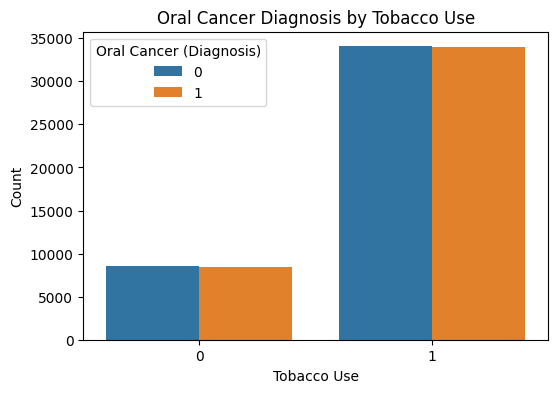

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Tobacco Use", hue="Oral Cancer (Diagnosis)", data=df)
plt.title("Oral Cancer Diagnosis by Tobacco Use")
plt.xlabel("Tobacco Use")
plt.ylabel("Count")
plt.show()

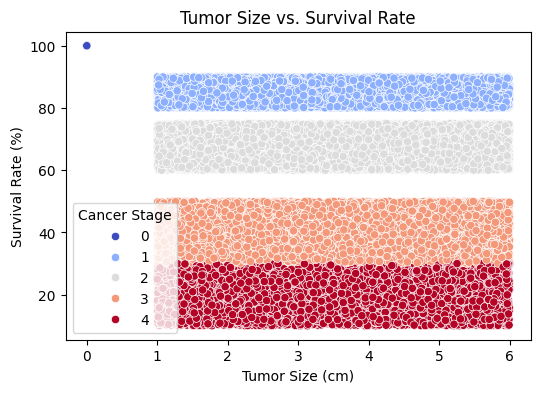

In [10]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x="Tumor Size (cm)", y="Survival Rate (5-Year, %)", hue="Cancer Stage", data=df, palette="coolwarm")
plt.title("Tumor Size vs. Survival Rate")
plt.xlabel("Tumor Size (cm)")
plt.ylabel("Survival Rate (%)")
plt.show()

In [11]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

In [12]:
df.drop(["ID", "Country"], axis =1, inplace=True)

In [13]:
# Separate features and target
X = df.drop('Oral Cancer (Diagnosis)', axis=1)
Y = df['Oral Cancer (Diagnosis)']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()

In [16]:
numerical_cols = ["Age", "Tumor Size (cm)", "Cost of Treatment (USD)", "Economic Burden (Lost Workdays per Year)"]

# Apply scaling to numerical columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [17]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [18]:
lr_train_predictions = lr.predict(X_train)
lr_test_predictions = lr.predict(X_test)

In [19]:
print(f"\nTraining Accuracy: {accuracy_score(Y_train, lr_train_predictions) * 100:.2f}%")
print(f"Testing Accuracy: {accuracy_score(Y_test, lr_test_predictions) * 100:.2f}%")


Training Accuracy: 100.00%
Testing Accuracy: 100.00%


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the model
rf_classifier.fit(X_train, Y_train)

# Predict on training data
y_train_pred = rf_classifier.predict(X_train)

# Predict on test data
y_test_pred = rf_classifier.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(Y_train, y_train_pred)
test_accuracy = accuracy_score(Y_test, y_test_pred)

# Display accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Detailed evaluation on test data
print("\nClassification Report (Test Data):")
print(classification_report(Y_test, y_test_pred))


Training Accuracy: 1.0000
Testing Accuracy: 1.0000

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8560
           1       1.00      1.00      1.00      8425

    accuracy                           1.00     16985
   macro avg       1.00      1.00      1.00     16985
weighted avg       1.00      1.00      1.00     16985



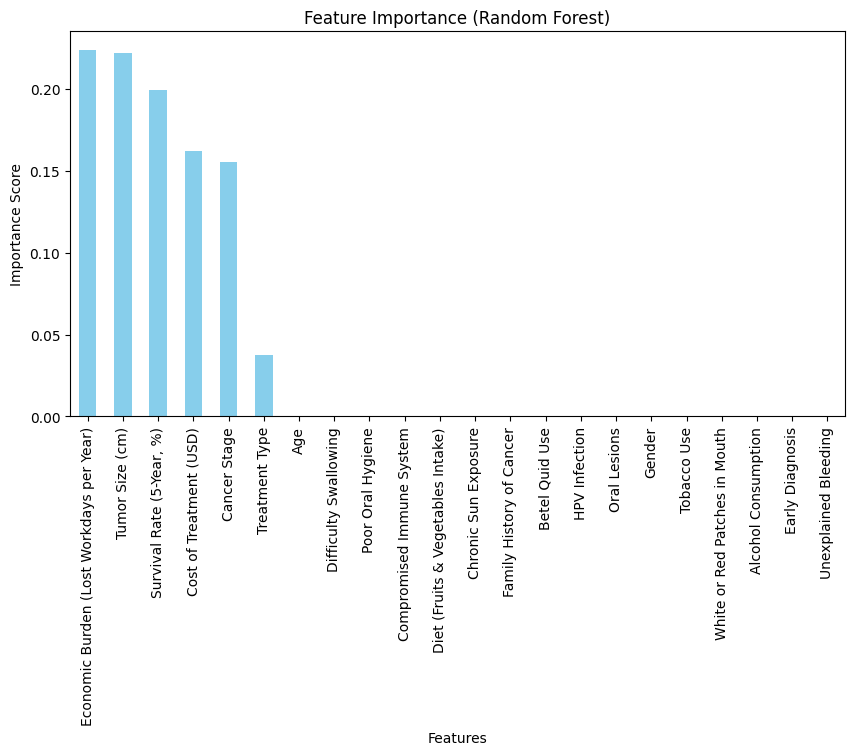

In [21]:
importances = rf_classifier.feature_importances_
feature_names = X.columns

feat_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

feat_importance.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Feature Importance (Random Forest)')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()


**example**

In [22]:
example_1 = pd.DataFrame({
    "Age": [60],
    "Gender": [1],
    "Tobacco Use": [1],
    "Alcohol Consumption": [1],
    "HPV Infection": [1],
    "Betel Quid Use": [1],
    "Chronic Sun Exposure": [0],
    "Poor Oral Hygiene": [1],
    "Diet (Fruits & Vegetables Intake)": [0],
    "Family History of Cancer": [1],
    "Compromised Immune System": [1],
    "Oral Lesions": [1],
    "Unexplained Bleeding": [1],
    "Difficulty Swallowing": [1],
    "White or Red Patches in Mouth": [1],
    "Tumor Size (cm)": [4.0],
    "Cancer Stage": [3],
    "Treatment Type": [2],  # Surgery + Radiotherapy
    "Survival Rate (5-Year, %)": [50],
    "Cost of Treatment (USD)": [15000],
    "Economic Burden (Lost Workdays per Year)": [60],
    "Early Diagnosis": [0]
})

example_2 = pd.DataFrame({
    "Age": [28],
    "Gender": [0],
    "Tobacco Use": [0],
    "Alcohol Consumption": [0],
    "HPV Infection": [0],
    "Betel Quid Use": [0],
    "Chronic Sun Exposure": [0],
    "Poor Oral Hygiene": [0],
    "Diet (Fruits & Vegetables Intake)": [1],
    "Family History of Cancer": [0],
    "Compromised Immune System": [0],
    "Oral Lesions": [0],
    "Unexplained Bleeding": [0],
    "Difficulty Swallowing": [0],
    "White or Red Patches in Mouth": [0],
    "Tumor Size (cm)": [1.0],
    "Cancer Stage": [0],
    "Treatment Type": [0],  # Only Surgery
    "Survival Rate (5-Year, %)": [95],
    "Cost of Treatment (USD)": [4000],
    "Economic Burden (Lost Workdays per Year)": [5],
    "Early Diagnosis": [1]
})




In [23]:
# Scale numerical columns
example_1[numerical_cols] = scaler.transform(example_1[numerical_cols])
example_2[numerical_cols] = scaler.transform(example_2[numerical_cols])


In [24]:
# Predict
pred_1 = rf_classifier.predict(example_1)
pred_2 = rf_classifier.predict(example_2)

print("Prediction for Example 1 (High Risk):", pred_1[0])
print("Prediction for Example 2 (Low Risk):", pred_2[0])


Prediction for Example 1 (High Risk): 1
Prediction for Example 2 (Low Risk): 0


In [ ]:
# List of all features in order
features = ['Age', 'Gender', 'Tobacco Use', 'Alcohol Consumption', 'HPV Infection', 
            'Betel Quid Use', 'Chronic Sun Exposure', 'Poor Oral Hygiene', 
            'Diet (Fruits & Vegetables Intake)', 'Family History of Cancer', 
            'Compromised Immune System', 'Oral Lesions', 'Unexplained Bleeding', 
            'Difficulty Swallowing', 'White or Red Patches in Mouth', 
            'Tumor Size (cm)', 'Cancer Stage', 'Treatment Type', 
            'Survival Rate (5-Year, %)', 'Cost of Treatment (USD)', 
            'Economic Burden (Lost Workdays per Year)', 'Early Diagnosis']

# Create an empty dictionary to store user inputs
user_data = {}

# Asking input one by one
for feature in features:
    value = float(input(f"Enter value for '{feature}': "))
    user_data[feature] = value

# Convert to DataFrame
user_df = pd.DataFrame([user_data])

# Scaling numerical columns
user_df[numerical_cols] = scaler.transform(user_df[numerical_cols])

# Predict class and probability
user_pred = rf_classifier.predict(user_df)[0]
user_prob = rf_classifier.predict_proba(user_df)[0][1]

# Fancy output
def pretty_print(prediction, probability):
    print("\n🌟 Prediction Result 🌟")
    if prediction == 1:
        print(f"⚠️  High Risk of Oral Cancer Detected!")
    else:
        print(f"✅ No Oral Cancer Detected. Patient seems healthy.")
    print(f"🧪 Prediction Confidence: {probability*100:.2f}%\n")

pretty_print(user_pred, user_prob)
